In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import netCDF4
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [2]:
#Test_Images = np.load('/fast/gmooers/Preprocessed_Data/W_100_X/Space_Time_W_Training.npy')
Test_Images = np.load('/fast/gmooers/Preprocessed_Data/W_Trial/Space_Time_W_Training.npy')
#Test_Images = np.load('/fast/gmooers/Preprocessed_Data/W_100_X/Space_Time_W_Test.npy')

#Max_Scalar = np.load('/fast/gmooers/Preprocessed_Data/W_100_X/Space_Time_Max_Scalar.npy')
#Min_Scalar = np.load('/fast/gmooers/Preprocessed_Data/W_100_X/Space_Time_Min_Scalar.npy')
Max_Scalar = np.load('/fast/gmooers/Preprocessed_Data/W_Trial/Space_Time_Max_Scalar.npy')
Min_Scalar = np.load('/fast/gmooers/Preprocessed_Data/W_Trial/Space_Time_Min_Scalar.npy')

Unscaled_Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
Cluster_Test = Test_Images.reshape((len(Test_Images),128*30))

In [3]:
N_cluster=3
km = KMeans(n_clusters=N_cluster, init='k-means++')
Cluster_Test = Test_Images.reshape((len(Test_Images),128*30))
y_km = km.fit_predict(Cluster_Test)

In [4]:
group = {}
mean = {}
std = {}
for igroup in range(N_cluster):
    group[igroup] = Test_Images[y_km==igroup,:,:]
    mean[igroup] = np.mean(group[igroup],axis=0)
    std[igroup] = np.std(group[igroup],axis=0)

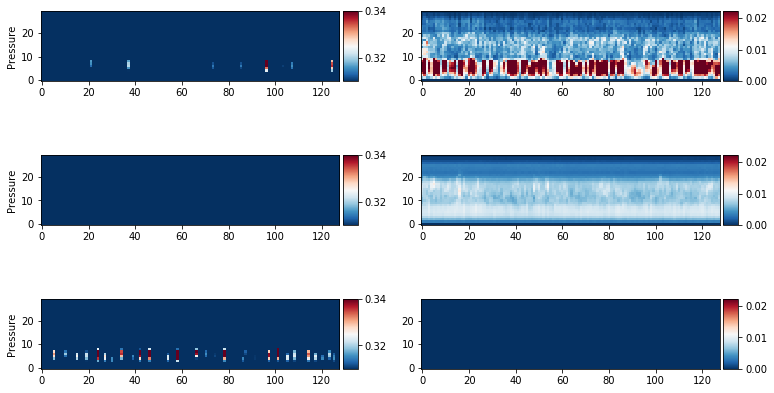

In [5]:
vmax_mean = 0.34
vmin_mean = 0.31
vmax_std = 0.022325523204877725
vmin_std = 0.0
cmap="RdBu_r"
var_labels = ["Group 1", "Group 2", "Group 3", "Group 4"]
fig, ax = plt.subplots(nrows=N_cluster,ncols=2,figsize=(12.5,7.5))
for igroup in range(N_cluster):
    axes = ax[igroup]
    cs = axes[0].imshow(mean[igroup], cmap=cmap, vmax = vmax_mean, vmin = vmin_mean)
    divider = make_axes_locatable(axes[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs, cax=cax)
    cs = axes[1].imshow(std[igroup], cmap=cmap, vmax = vmax_std, vmin = vmin_std)
    divider = make_axes_locatable(axes[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs, cax=cax)
    axes[0].set_ylim(axes[0].get_ylim()[::-1])
    axes[1].set_ylim(axes[1].get_ylim()[::-1])
    if igroup == 3:
        axes[0].set_xlabel('CRMs')
        axes[1].set_xlabel('CRMs')
    axes[0].set_ylabel('Pressure')
    #axes.set_title(var_labels[igroup])
#plt.savefig("model_graphs/Clusters.png")

In [6]:
lengths = []
for igroup in range(N_cluster):
    lengths.append(len(group[igroup]))
    
intmax = np.argmax(np.array(lengths))
temp_thing = Test_Images[y_km!=intmax ,:,:]

In [14]:
print(len(Test_Images))
print(len(temp_thing))
print(y_km.shape)
print(y_km[1000:1300])

8371
10
(8371,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
w_Shuffled = shuffle(temp_thing)

In [ ]:
w_train = w_Shuffled[:int(4*len(w_Shuffled)/5),:,:]
w_test = w_Shuffled[int(4*len(w_Shuffled)/5):,:,:]

In [ ]:
#np.save('/fast/gmooers/Preprocessed_Data/W_Big_Deep_Convection/Space_Time_W_Training.npy', w_train)
#np.save('/fast/gmooers/Preprocessed_Data/W_Big_Deep_Convection/Space_Time_W_Test.npy', w_test)
#np.save('/fast/gmooers/Preprocessed_Data/W_Big_Deep_Convection/Space_Time_Max_Scalar.npy', Max_Scalar)
#np.save('/fast/gmooers/Preprocessed_Data/W_Big_Deep_Convection/Space_Time_Min_Scalar.npy', Min_Scalar)

In [ ]:
other_temp = Test_Images[y_km==intmax ,:,:]
new_temp = other_temp[:len(w_Shuffled),:,:]

In [ ]:
complete_array = np.concatenate((new_temp, w_Shuffled))

In [ ]:
y_labels = np.zeros(shape=(len(complete_array), len(complete_array[0]),len(complete_array[0][0])))
y_labels[int(len(y_labels)/2):,:,:] = 1.0

In [ ]:
X_Shuffled, Y_Shuffled = shuffle(complete_array, y_labels, random_state=0)

In [ ]:
w_train = X_Shuffled[:int(4*len(X_Shuffled)/5),:,:]
w_test = X_Shuffled[int(4*len(X_Shuffled)/5):,:,:]
y_train = Y_Shuffled[:int(4*len(Y_Shuffled)/5),:,:]
y_test =  Y_Shuffled[int(4*len(Y_Shuffled)/5):,:,:]

In [ ]:
#np.save('/fast/gmooers/Preprocessed_Data/W_Big_Half_Deep_Convection/Space_Time_W_Training.npy', w_train)
#np.save('/fast/gmooers/Preprocessed_Data/W_Big_Half_Deep_Convection/Space_Time_W_Test.npy', w_test)
#np.save('/fast/gmooers/Preprocessed_Data/W_Big_Half_Deep_Convection/Space_Time_Max_Scalar.npy', Max_Scalar)
#np.save('/fast/gmooers/Preprocessed_Data/W_Big_Half_Deep_Convection/Space_Time_Min_Scalar.npy', Min_Scalar)
#np.save('/fast/gmooers/Preprocessed_Data/W_Big_Half_Deep_Convection/Y_Train.npy', y_train)
#np.save('/fast/gmooers/Preprocessed_Data/W_Big_Half_Deep_Convection/Y_Test.npy', y_test)